In [1]:
%cat 0Source_Citation.txt

Source and citation

- This notebook is a part of the `pytheos` package.
- Website: http://github.com/SHDShim/pytheos.
- How to cite: S.-H. Shim (2017) Pytheos - a python tool set for equations of state. DOI: 10.5281/zenodo.802392


In [2]:
%matplotlib inline
# %matplotlib notebook # for interactive

For high dpi displays.

In [3]:
%config InlineBackend.figure_format = 'retina'

# 0. General note

- This notebook shows how to propagate uncertainties to get reasonable error bars for pressure.
- We use MgO as an example.

# 1. General setup

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import uncertainties as uct
from uncertainties import unumpy as unp
import pandas as pd
import pytheos as eos

# 2. Assign uncertainties to the EOS parameters

Uncertainties of parameters can be defined using the `uncertainties` package.  The parameter values used in this example are just for demonstration purpose.  For more accurate values, please refer to the recent literature.

In [5]:
v0 = uct.ufloat(74.698, 0.004)
k0 = uct.ufloat(160., 3.)
k0p = uct.ufloat(4.0, 0.3)

We make an `numpy` array for volume at high pressure.

In [6]:
n_pts = 20 
vv0 = np.linspace(1.,0.8, n_pts)
v = vv0 * v0

Calculate pressure from `pytheos`.

In [7]:
p = eos.bm3_p(v, v0, k0, k0p)

### How to get help

You may get help by using `help(function_name)`.

In [8]:
help(eos.bm3_p)

Help on function bm3_p in module pytheos.eqn_bm3:

bm3_p(v, v0, k0, k0p, p_ref=0.0)
    calculate pressure from 3rd order Birch-Murnathan equation
    
    :param v: volume at different pressures
    :param v0: volume at reference conditions
    :param k0: bulk modulus at reference conditions
    :param k0p: pressure derivative of bulk modulus at different conditions
    :param p_ref: reference pressure (default = 0)
    :return: pressure



Now you can see that error bars for the EOS parameters are used in error propagation calculation to pressure value.  Note that the uncertainties in the EOS parameters are correctly applied for propagating uncertainties to both molar volume and pressure.

In [9]:
df = pd.DataFrame()
df['unit-cell volume'] = v
df['pressure'] = p
print(df.to_string(index=False))

unit-cell volume       pressure
  74.698+/-0.004        0.0+/-0
  73.912+/-0.004  1.729+/-0.033
  73.125+/-0.004    3.55+/-0.07
  72.339+/-0.004    5.47+/-0.11
  71.553+/-0.004    7.50+/-0.15
  70.767+/-0.004    9.64+/-0.20
  69.980+/-0.004   11.89+/-0.25
  69.194+/-0.004   14.27+/-0.32
  68.408+/-0.004     16.8+/-0.4
  67.621+/-0.004     19.4+/-0.5
  66.835+/-0.004     22.2+/-0.6
66.0488+/-0.0035     25.2+/-0.7
65.2625+/-0.0035     28.3+/-0.8
64.4762+/-0.0035     31.6+/-0.9
63.6899+/-0.0034     35.1+/-1.1
62.9036+/-0.0034     38.8+/-1.3
62.1173+/-0.0033     42.7+/-1.5
61.3310+/-0.0033     46.8+/-1.7
60.5447+/-0.0032     51.2+/-2.0
59.7584+/-0.0032     55.8+/-2.3


Unfortunately to plot with `matplotlib`, you need to separate nominal values from standard deviation.

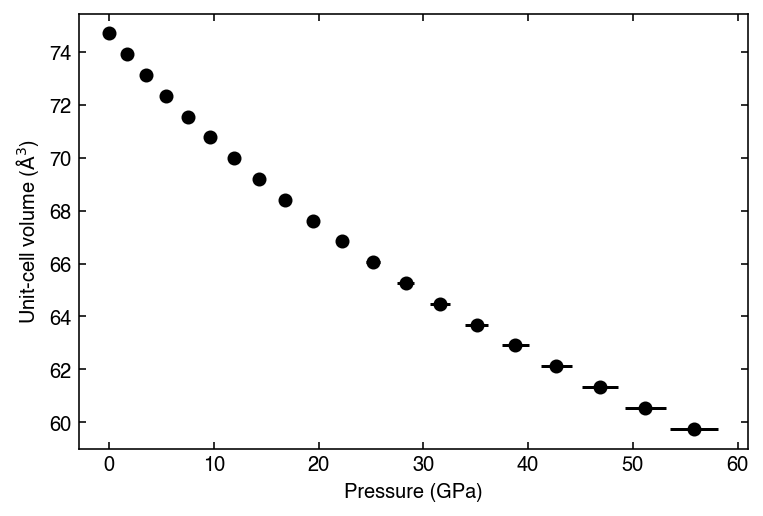

In [10]:
f = plt.figure()
plt.errorbar(unp.nominal_values(p), unp.nominal_values(v), fmt='ko', \
             xerr=unp.std_devs(p), yerr=unp.std_devs(v))
plt.xlabel('Pressure (GPa)'); plt.ylabel('Unit-cell volume ($\mathrm{\AA}^3$)');

# 3. Calculate volume from pressure using pytheos

`Pytheos` provides functions to calculate volume at a given pressure with error propagation.

In [11]:
v_cal = eos.bm3_v(p, v0, k0, k0p)

In [12]:
df = pd.DataFrame()
df['pressure'] = p
df['unit-cell volume'] = v_cal
print(df.to_string(index=False))

pressure  unit-cell volume
      0.0+/-0    74.698+/-0.004
1.729+/-0.033    73.912+/-0.004
  3.55+/-0.07    73.125+/-0.004
  5.47+/-0.11    72.339+/-0.004
  7.50+/-0.15    71.553+/-0.004
  9.64+/-0.20    70.767+/-0.004
 11.89+/-0.25    69.980+/-0.004
 14.27+/-0.32    69.194+/-0.004
   16.8+/-0.4    68.408+/-0.004
   19.4+/-0.5    67.621+/-0.004
   22.2+/-0.6    66.835+/-0.004
   25.2+/-0.7  66.0488+/-0.0035
   28.3+/-0.8  65.2625+/-0.0035
   31.6+/-0.9  64.4762+/-0.0035
   35.1+/-1.1  63.6899+/-0.0034
   38.8+/-1.3  62.9036+/-0.0034
   42.7+/-1.5  62.1173+/-0.0033
   46.8+/-1.7  61.3310+/-0.0033
   51.2+/-2.0  60.5447+/-0.0032
   55.8+/-2.3  59.7584+/-0.0032


Compare this table with the one we showed above for accuracy check.

# 4. Bulk modulus at high pressure

You can also propagate uncertainties in bulk modulus calculation.

In [13]:
k = eos.bm3_k(p, v0, k0, k0p)

In [14]:
df = pd.DataFrame()
df['pressure'] = p
df['bulk modulus'] = k
print(df.to_string(index=False))

pressure bulk modulus
      0.0+/-0  160.0+/-3.0
1.729+/-0.033  166.9+/-3.2
  3.55+/-0.07  174.1+/-3.4
  5.47+/-0.11      182+/-4
  7.50+/-0.15      189+/-4
  9.64+/-0.20      198+/-5
 11.89+/-0.25      206+/-6
 14.27+/-0.32      215+/-6
   16.8+/-0.4      224+/-7
   19.4+/-0.5      234+/-8
   22.2+/-0.6      244+/-9
   25.2+/-0.7     255+/-10
   28.3+/-0.8     266+/-11
   31.6+/-0.9     278+/-13
   35.1+/-1.1     291+/-14
   38.8+/-1.3     304+/-16
   42.7+/-1.5     317+/-18
   46.8+/-1.7     332+/-20
   51.2+/-2.0     347+/-22
   55.8+/-2.3     362+/-24


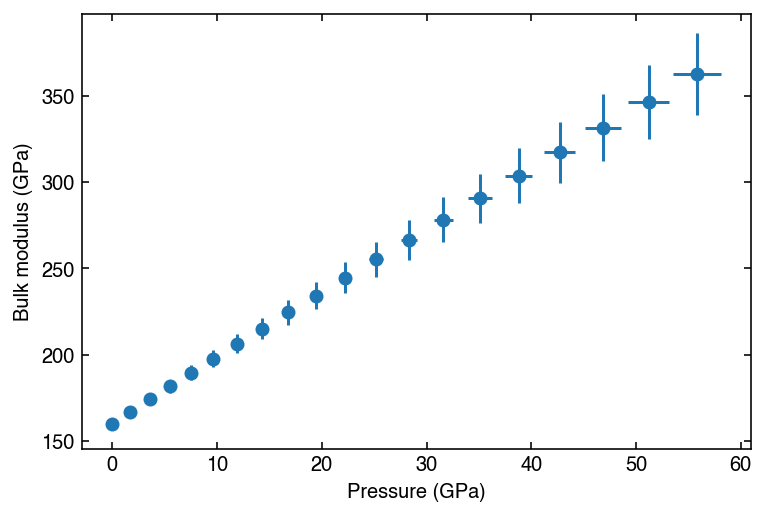

In [15]:
f = plt.figure()
plt.errorbar( unp.nominal_values(p), unp.nominal_values(k), \
             xerr=unp.std_devs(p), yerr=unp.std_devs(k), fmt='o')
plt.xlabel('Pressure (GPa)'); plt.ylabel('Bulk modulus (GPa)');

# 5. High temperature equation of state

The constant q assumption has been used widely for the thermal part of the mantle phases.  Below, we assign uncertainties to the thermal parameters of MgO.

In [16]:
gamma0 = uct.ufloat(1.45, 0.02)
q = uct.ufloat(0.8, 0.3)
theta0 = uct.ufloat(800., 0.)

We will use `constq_pth` for calculating thermal pressure part of the EOS.  Below, I demonstrate how to get help for the function.

In [17]:
help(eos.constq_pth)

Help on function constq_pth in module pytheos.eqn_therm_constq:

constq_pth(v, temp, v0, gamma0, q, theta0, n, z, t_ref=300.0, three_r=24.943379399999998)
    calculate thermal pressure for constant q
    
    :param v: unit-cell volume in A^3
    :param temp: temperature
    :param v0: unit-cell volume in A^3 at 1 bar
    :param gamma0: Gruneisen parameter at 1 bar
    :param q: logarithmic derivative of Gruneisen parameter
    :param theta0: Debye temperature in K
    :param n: number of atoms in a formula unit
    :param z: number of formula unit in a unit cell
    :param t_ref: reference temperature
    :param three_r: 3R in case adjustment is needed
    :return: thermal pressure in GPa



We calculate total pressure at 2000 K below.  `eos.constq_pth` requires input of volume and temperature with the same number of elements.  For 2000-K isotherm, we generate a temperature array with 2000 for all elements.

In [18]:
p_hT = eos.bm3_p(v, v0, k0, k0p) + eos.constq_pth(v, np.ones_like(v)*2000., v0, gamma0, q, theta0, 2, 4)

In [19]:
df = pd.DataFrame()
df['unit-cell volume'] = v
df['pressure@300K'] = p
df['pressure@2000K'] = p_hT
print(df.to_string(index=False))

unit-cell volume  pressure@300K pressure@2000K
  74.698+/-0.004        0.0+/-0   10.40+/-0.14
  73.912+/-0.004  1.729+/-0.033   12.14+/-0.15
  73.125+/-0.004    3.55+/-0.07   13.97+/-0.17
  72.339+/-0.004    5.47+/-0.11   15.90+/-0.20
  71.553+/-0.004    7.50+/-0.15   17.93+/-0.25
  70.767+/-0.004    9.64+/-0.20   20.07+/-0.30
  69.980+/-0.004   11.89+/-0.25   22.34+/-0.35
  69.194+/-0.004   14.27+/-0.32     24.7+/-0.4
  68.408+/-0.004     16.8+/-0.4     27.2+/-0.5
  67.621+/-0.004     19.4+/-0.5     29.9+/-0.6
  66.835+/-0.004     22.2+/-0.6     32.7+/-0.7
66.0488+/-0.0035     25.2+/-0.7     35.7+/-0.8
65.2625+/-0.0035     28.3+/-0.8     38.8+/-0.9
64.4762+/-0.0035     31.6+/-0.9     42.1+/-1.1
63.6899+/-0.0034     35.1+/-1.1     45.6+/-1.2
62.9036+/-0.0034     38.8+/-1.3     49.3+/-1.4
62.1173+/-0.0033     42.7+/-1.5     53.2+/-1.6
61.3310+/-0.0033     46.8+/-1.7     57.3+/-1.8
60.5447+/-0.0032     51.2+/-2.0     61.7+/-2.1
59.7584+/-0.0032     55.8+/-2.3     66.3+/-2.4
